## Imbalanced Learn Tutorial
http://contrib.scikit-learn.org/imbalanced-learn/stable/over_sampling.html

In [1]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from collections import Counter
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def make_mesh(x, y, padding=.1, h=.005):
    x_min, x_max = x.min()-padding, x.max()+padding
    y_min, y_max = y.min()-padding, y.max()+padding

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [3]:
def plot_decision_boundary(models, titles, testdata, mesh):
    
    xx,yy = mesh
    
    fig, sub = plt.subplots(1,2, figsize=(12,7))
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, title, ax, (X_tr, y_tr, X_te, y_te) in zip(models, titles, sub.flatten(), test_data):

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        score = clf.score(X_te, y_te)
        Z = Z.reshape(xx.shape)

        ax.scatter(X_tr[:,0], X_tr[:,1], c=y_tr, cmap=plt.cm.coolwarm, zorder=11, edgecolor='k', s=20)

        ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
        ax.set_title("{} score: {:.2f}%".format(title, score*100))
        ax.set_xticks(())
        ax.set_yticks(())

In [4]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3, 
                           n_clusters_per_class=1,
                           weights=[.01, .02, .97],
                           class_sep=.8, random_state=0)
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(X_resampled, y_resampled, test_size=.3)

print(sorted(Counter(y).items()))
print(sorted(Counter(y_resampled).items()))

[(0, 64), (1, 118), (2, 4818)]
[(0, 4818), (1, 4818), (2, 4818)]


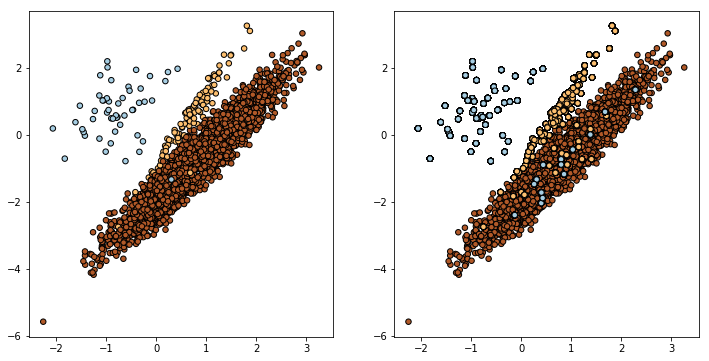

In [5]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired, edgecolor='k')

plt.subplot(122)
plt.scatter(X_resampled[:,0], X_resampled[:,1], c=y_resampled, s=30, cmap=plt.cm.Paired, edgecolor='k')

plt.show()

In [6]:
clf_og = SVC(kernel='rbf').fit(X_train, y_train)
clf_re = SVC(kernel='rbf').fit(X_re_train, y_re_train)

print(clf_og.score(X_test, y_test))
print(clf_re.score(X_re_test, y_re_test))

0.986666666667
0.864422411805


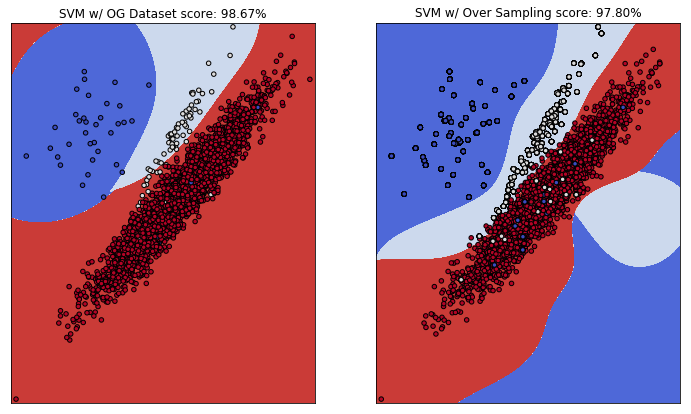

In [7]:
models = (clf_og, clf_re)
titles = ("SVM w/ OG Dataset", "SVM w/ Over Sampling")
test_data = ((X_train, y_train, X_test, y_test), (X_re_train, y_re_train, X_test, y_test))
xx, yy = make_mesh(X[:, 0], X[:, 1], padding=.1, h=.005)

plot_decision_boundary(models, titles, test_data, (xx, yy))

## SMOTE & ADASYN

In [18]:
X_smote, y_smote = SMOTE(kind='borderline1').fit_sample(X,y)
print(sorted(Counter(y_smote).items()))

X_adasyn, y_adasyn = SMOTE(kind='borderline2').fit_sample(X,y)
print(sorted(Counter(y_adasyn).items()))

[(0, 4818), (1, 4818), (2, 4818)]
[(0, 4818), (1, 4817), (2, 4818)]


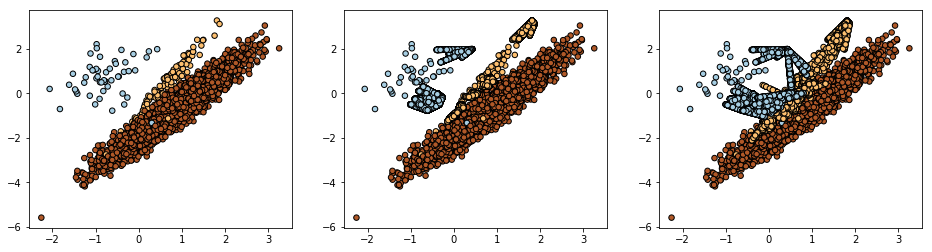

In [19]:
plt.figure(figsize=(16,4))

plt.subplot(131)
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired, edgecolor='k')

plt.subplot(132)
plt.scatter(X_smote[:,0], X_smote[:,1], c=y_smote, s=30, cmap=plt.cm.Paired, edgecolor='k')

plt.subplot(133)
plt.scatter(X_adasyn[:,0], X_adasyn[:,1], c=y_adasyn, s=30, cmap=plt.cm.Paired, edgecolor='k')

In [20]:
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_smote, y_smote, test_size=.3)
X_ada_train, X_ada_test, y_ada_train, y_ada_test = train_test_split(X_adasyn, y_adasyn, test_size=.3)

In [21]:
clf_sm = SVC(kernel="rbf").fit(X_sm_train, y_sm_train)
clf_ada = SVC(kernel='rbf').fit(X_ada_train, y_ada_train)

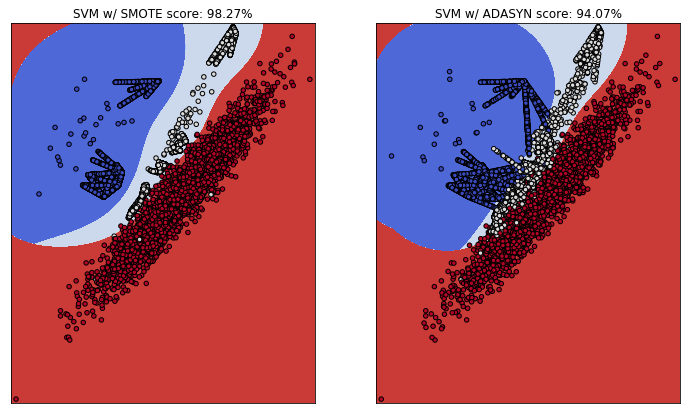

In [22]:
models = (clf_sm, clf_ada)
titles = ("SVM w/ SMOTE", "SVM w/ ADASYN")
test_data = ((X_sm_train, y_sm_train, X_test, y_test), (X_ada_train, y_ada_train, X_test, y_test))
xx, yy = make_mesh(X[:, 0], X[:, 1], padding=.1, h=.005)

plot_decision_boundary(models, titles, test_data, (xx, yy))